In [2]:
import os
import sys
import cv2
import torch

import numpy as np
import albumentations as album
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

from torchmetrics import JaccardIndex

sys.path.insert(0, '..')
from loaders.datasets import AmsterdamDataset
from utils.general import visualize

In [3]:
images = os.path.join('..', 'data', 'fences-quays', 'images')

train_annotations = os.path.join('..', 'data', 'fences-quays', 'annotations', 'train-annotations-6px.json')
valid_annotations = os.path.join('..', 'data', 'fences-quays', 'annotations', 'valid-annotations-6px.json')

test_annotations = os.path.join('..', 'data', 'fences-quays', 'annotations', 'test-annotations-6px.json')


train_data = AmsterdamDataset(images, train_annotations)
valid_data = AmsterdamDataset(images, valid_annotations)

test_data = AmsterdamDataset(images, test_annotations)

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [5]:
train_fnames = set(train_data.fnames)
valid_fnames = set(valid_data.fnames)

test_fnames = set(test_data.fnames)

In [6]:
train_fnames.intersection(valid_fnames)

set()

In [7]:
test_fnames.intersection(valid_fnames)

set()

In [8]:
train_fnames.intersection(test_fnames)

set()

In [3]:
%matplotlib inline
import albumentations as A

from skimage import io
from torchvision import transforms
from utils.augmentation import to_tensor

# preprocessing_fn = smp.encoders.get_preprocessing_fn('efficientnet-b3', 'imagenet')
model = torch.load(os.path.join('..', 'experiments', 'fences', 'resnet18-unet-1600s-aug', 'best_model.pth'))

transform = A.RandomCrop(width=1024, height=512)

In [4]:
image = io.imread(os.path.join('..', '..', 'docs', 'figures', 'training', 'augmented_image.png'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

ValueError: Requested crop size (512, 1024) is larger than the image size (304, 594)

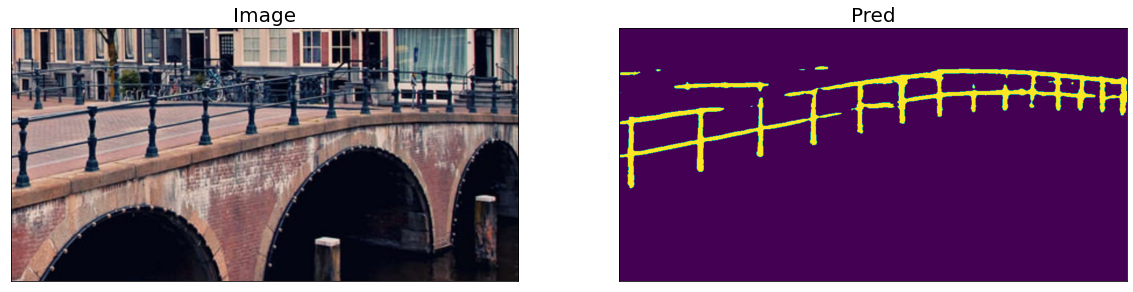

In [51]:
image = io.imread(os.path.join('..', 'data', 'random_single_test.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

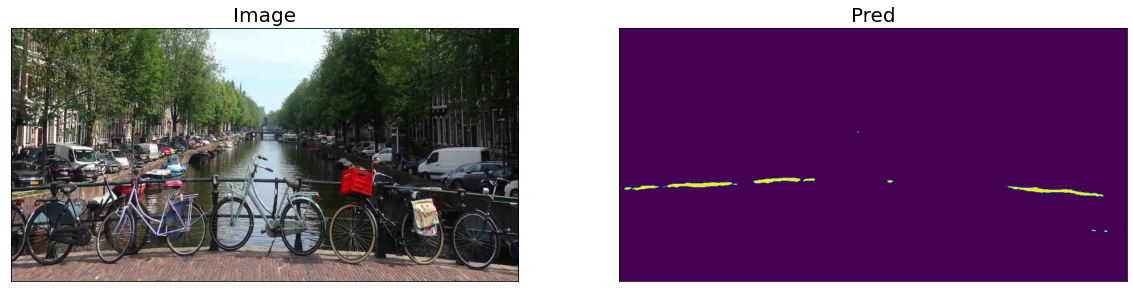

In [66]:
image = io.imread(os.path.join('..', 'data', 'another_test.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

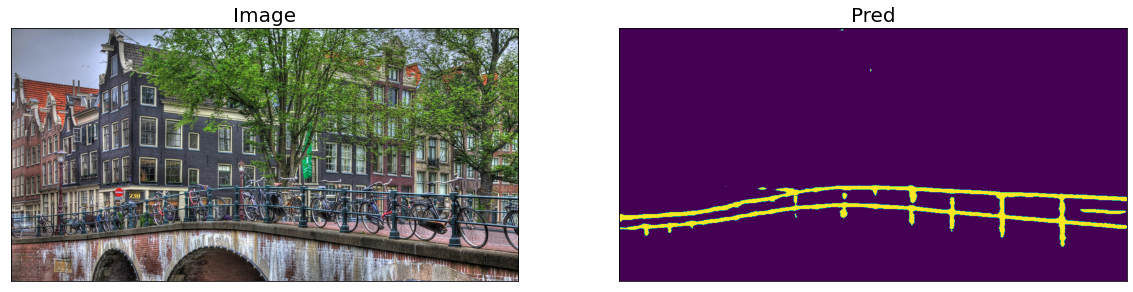

In [57]:
image = io.imread(os.path.join('..', 'data', 'test3.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

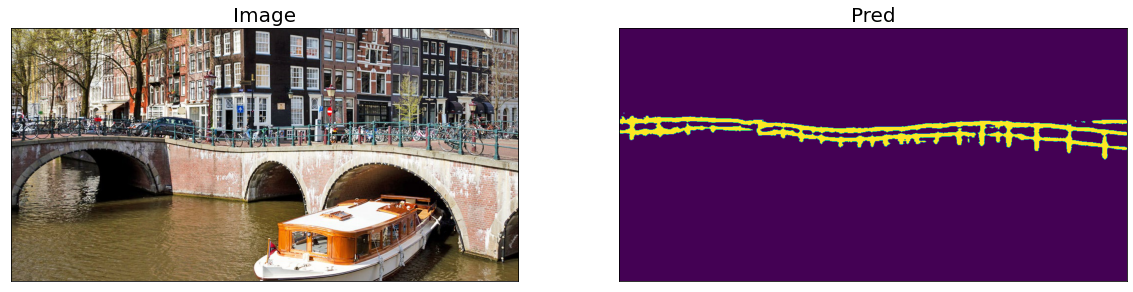

In [58]:
image = io.imread(os.path.join('..', 'data', 'test4.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

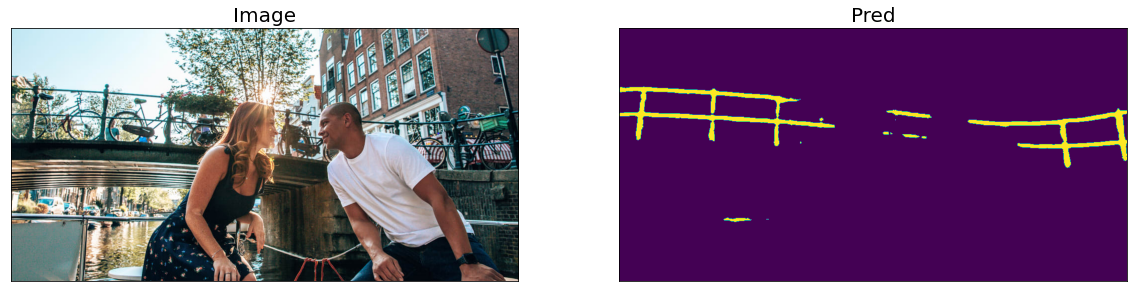

In [59]:
image = io.imread(os.path.join('..', 'data', 'test5.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

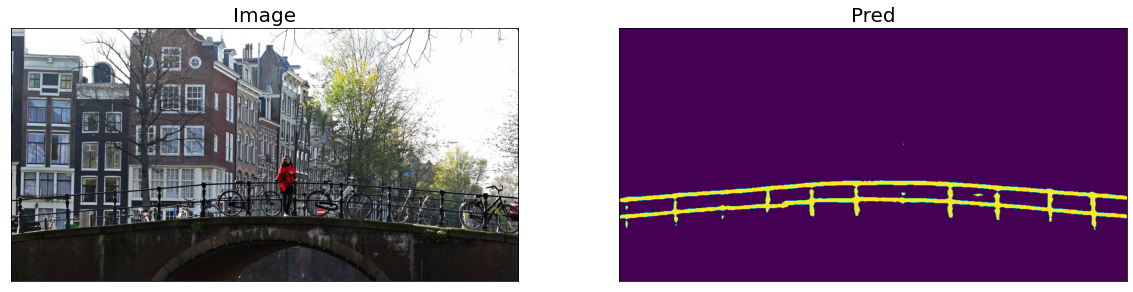

In [60]:
image = io.imread(os.path.join('..', 'data', 'test6.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

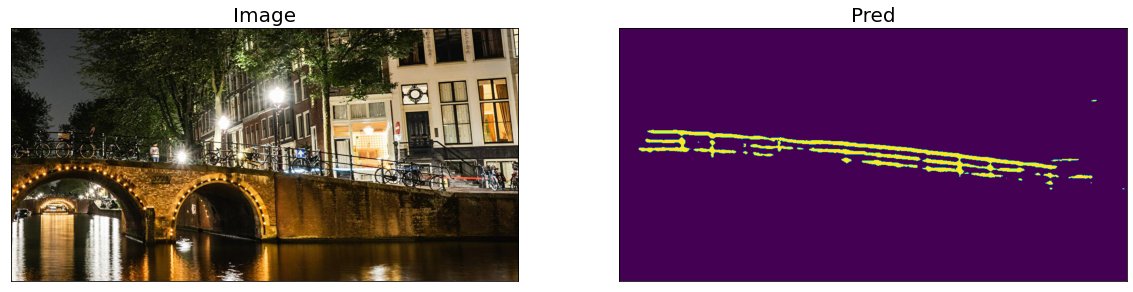

In [61]:
image = io.imread(os.path.join('..', 'data', 'test7.jpg'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)

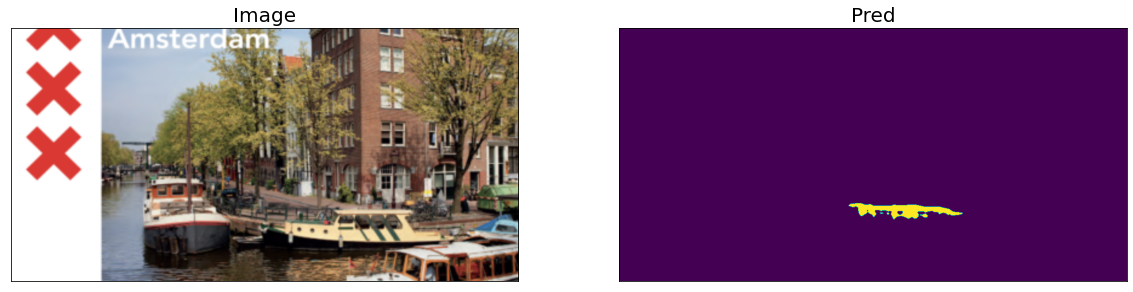

In [65]:
transform = A.Resize(width=1024, height=512)

image = io.imread(os.path.join('..', 'data', 'test8.png'))
image = transform(image=image)['image']
pred = model(torch.as_tensor(to_tensor(image)).unsqueeze(0).cuda())

visualize(image=image, pred=pred.cpu().squeeze().detach().numpy() > .5)